### Evaluating and visualizing gene ontology (GO) terms associated with algal and bacterial peptides in degradation experiment

#### Beginning with: GO term abundances in spreadsheets

#### Goal: heatmaps of algal and bacterial GO terms over the 4 timepoints

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce

In [2]:
# read the data into pandas dataframes
diatom = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/diatom-GO-cc.csv", index_col=0)

diatom.head()

# rename columns
names = ['Day 0 endo.', 'Day 2 endo.', 'Day 5 endo.', 'Day 12 endo.', \
        'Day 0 exo.', 'Day 2 exo.', 'Day 5 exo.', 'Day 12 exo.']
diatom.columns = names

bacteria = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/bacteria-GO-cc.csv", index_col=0)

#bacteria.columns = names

diatom.head()

,Day 0 endo.,Day 2 endo.,Day 5 endo.,Day 12 endo.,Day 0 exo.,Day 2 exo.,Day 5 exo.,Day 12 exo.
GO term,,,,,,,,
GO:0009538 photosystem I reaction center,8.0,7.0,8.0,7.0,NaN,7.0,NaN,NaN
GO:0009507 chloroplast,46.0,19.0,34.0,30.0,3.0,35.0,NaN,NaN
GO:0016021 integral component of membrane,41.0,14.0,28.0,24.0,2.0,19.0,NaN,NaN
GO:0009536 plastid,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
GO:0005886 plasma membrane,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# read the data into pandas dataframes
diatom_endo = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/diatom-GO-cc-ENDO.csv", index_col=0)

diatom_exo = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/diatom-GO-cc-EXO.csv", index_col=0)

# rename columns
names = ['Day 0', 'Day 2', 'Day 5', 'Day 12']

diatom_endo.columns = names
diatom_exo.columns = names

diatom_endo.head()

,Day 0,Day 2,Day 5,Day 12
GO term,,,,
GO:0009538 photosystem I reaction center,8.0,2.0,8.0,7.0
GO:0009507 chloroplast,46.0,2.0,34.0,30.0
GO:0016021 integral component of membrane,41.0,3.0,28.0,24.0
GO:0009536 plastid,NaN,NaN,NaN,1.0
GO:0005886 plasma membrane,NaN,1.0,NaN,NaN


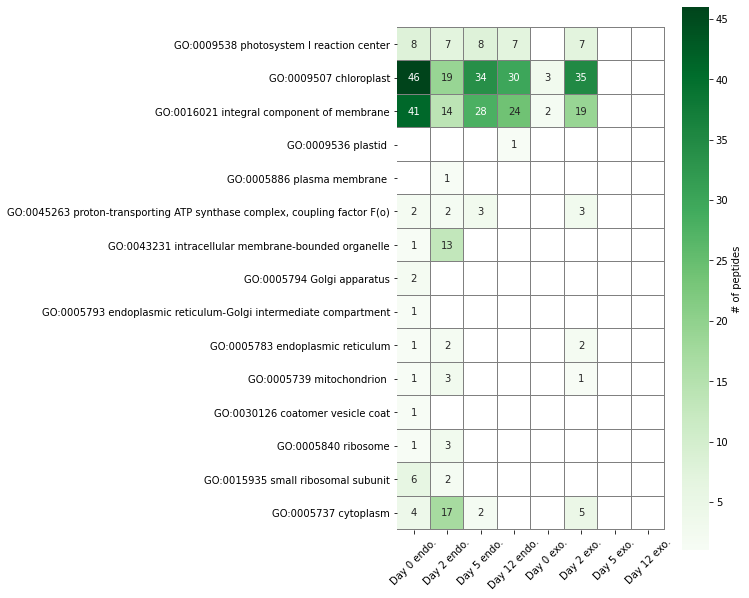

In [4]:
# plot heatmap

f,(ax1) = plt.subplots(1,sharey=True, sharex=True, figsize=(6, 10))

ax1 = sns.heatmap(diatom, cmap="Greens", annot=True, linecolor = 'grey', linewidths=.01, \
                square=True, cbar_kws={'label': '# of peptides'})

ax1.set_ylabel('')

# turn the axis label
for item in ax1.get_yticklabels():
    item.set_rotation(0)

for item in ax1.get_xticklabels():
    item.set_rotation(45)

# save figure
#plt.savefig('seabornPandas.png', dpi=300)
plt.show()

Text(0.5, 101.65714285714279, 'Exogenous')

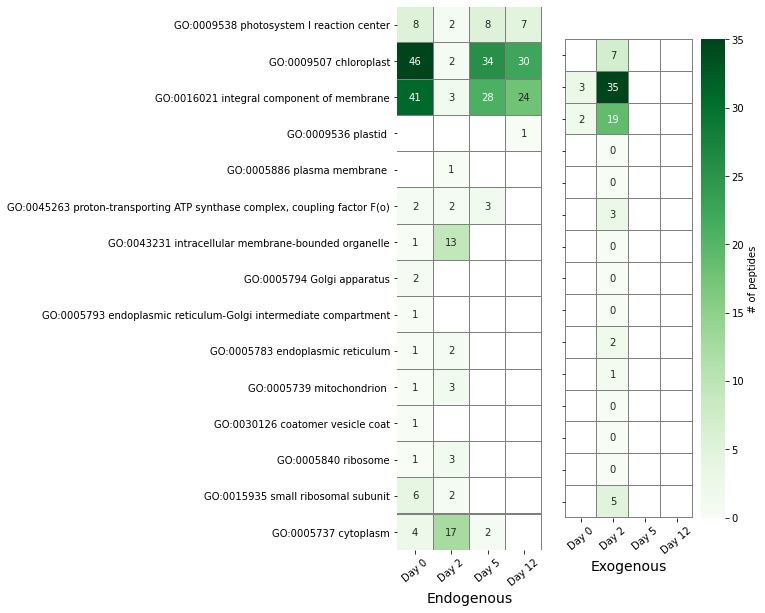

In [58]:
# plot heatmap

f,(ax1,ax2) = plt.subplots(1,2,sharey=True, sharex=True, figsize=(6, 10))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.01)

maskn = diatom_endo.isnull()
maskx = diatom_exo.isnull()

g1 = sns.heatmap(diatom_endo,cmap="Greens",cbar=False,ax=ax1, linecolor = 'grey', linewidths=.01, \
                 mask=maskn, square=True, annot=True)
g1.set_ylabel('')
g1.set_xticklabels(diatom_endo.columns, rotation=40)
g1.set_xlabel('Endogenous', fontsize = 14)


g2 = sns.heatmap(diatom_exo,cmap="Greens",cbar=True,ax=ax2, linecolor = 'grey', linewidths=.01, \
                mask=maskx, vmin = 0, square=True, annot=True, cbar_kws={'label': '# of peptides'})
g2.set_ylabel('')
g2.set_xticklabels(diatom_exo.columns, rotation=40)
g2.set_xlabel('Exogenous', fontsize = 14)

Text(0.5, 69.0, 'Bacteria')

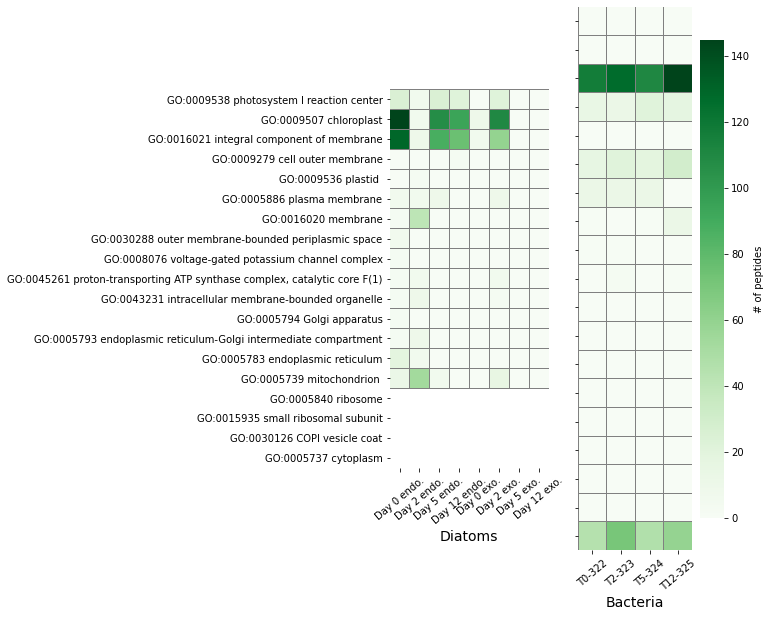

In [15]:
# plot heatmap

f,(ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(6, 10))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=0.01)

mask = diatom.isnull()
maskb = bacteria.isnull()


g1 = sns.heatmap(diatom,cmap="Greens",cbar=False,ax=ax1, linecolor = 'grey', linewidths=.01, \
                 mask=mask, square=True)
g1.set_ylabel('')
g1.set_xticklabels(diatom.columns, rotation=40)
g1.set_xlabel('Diatoms', fontsize = 14)


g2 = sns.heatmap(bacteria,cmap="Greens",cbar=True,ax=ax2, linecolor = 'grey', linewidths=.01, \
                mask=maskb, square=True, cbar_kws={'label': '# of peptides'})
g2.set_ylabel('')
g2.set_xticklabels(bacteria.columns, rotation=40)
g2.set_xlabel('Bacteria', fontsize = 14)

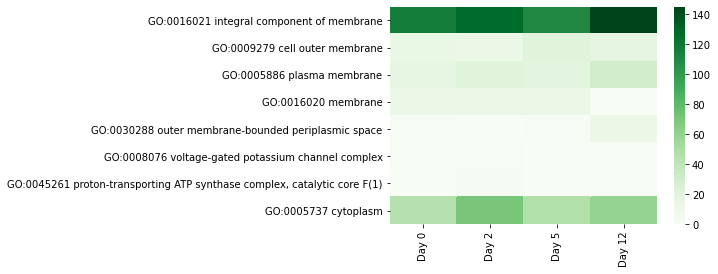

In [43]:
# plot heatmap
ax = sns.heatmap(bacteria, cmap="Greens")

ax.set_ylabel('')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

# save figure
#plt.savefig('seabornPandas.png', dpi=100)
plt.show()

### Bacterial GO term heatmap creation

#### Using the de novo peptide UniPept bacterial biological process (BP) GO term IDs

In [11]:
# read the bacterial GO term data into pandas dataframes
D0_bac = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/DN/TD+ND/T0_DN80_TD+ND_BP_GO.csv")

# concatenate GO-term and Name columns
D0_bac['GO term'] = D0_bac['GO-term'] + " " + D0_bac['Name']
del D0_bac['GO-term']
del D0_bac['Name']

print('322:', len(D0_bac))

# read the data into pandas dataframes
D2_bac = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/DN/TD+ND/T2_DN80_TD+ND_BP_GO.csv")

# concatenate GO-term and Name columns
D2_bac['GO term'] = D2_bac['GO-term'] + " " + D2_bac['Name']
del D2_bac['GO-term']
del D2_bac['Name']

print('323:', len(D2_bac))

# read the data into pandas dataframes
D5_bac = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/DN/TD+ND/T5_DN80_TD+ND_BP_GO.csv")

# concatenate GO-term and Name columns
D5_bac['GO term'] = D5_bac['GO-term'] + " " + D5_bac['Name']
del D5_bac['GO-term']
del D5_bac['Name']

print('324:', len(D5_bac))

# read the data into pandas dataframes
D12_bac = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/DN/TD+ND/T12_DN80_TD+ND_BP_GO.csv")

# concatenate GO-term and Name columns
D12_bac['GO term'] = D12_bac['GO-term'] + " " + D12_bac['Name']
del D12_bac['GO-term']
del D12_bac['Name']

print('325:', len(D12_bac))

322: 160
323: 206
324: 160
325: 219


In [12]:
# join the dataframes
d0d2 = pd.merge(D0_bac, D2_bac, on = ['GO term'], how = 'outer')

print('combined rows:', len(d0d2))

# rename columns
names = ['Day 0 bac', 'GO term', 'Day 2 bac']
         
d0d2.columns = names

combined rows: 264


In [13]:
# join the dataframes
d0d2d5 = pd.merge(d0d2, D5_bac, on = ['GO term'], how = 'outer')

print('combined rows:', len(d0d2d5))

# rename columns
names = ['Day 0 bac', 'GO term', 'Day 2 bac', 'Day 5 bac']
         
d0d2d5.columns = names

combined rows: 319


In [14]:
# join the dataframes
d0d2d5d12 = pd.merge(d0d2d5, D12_bac, on = ['GO term'], how = 'outer')

print('combined rows:', len(d0d2d5d12))

# rename columns
names = ['Day 0 bac', 'GO term', 'Day 2 bac', 'Day 5 bac', 'Day 12 bac']
         
d0d2d5d12.columns = names

combined rows: 381


In [15]:
d0d2d5d12.set_index('GO term', inplace = True)

combineBP = d0d2d5d12

# write combined GO term dataframe to a csv
combineBP.to_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/DN/TD+ND/DN80_combined_TD+ND_bp_GO.csv")

combineBP.head()

,Day 0 bac,Day 2 bac,Day 5 bac,Day 12 bac
GO term,,,,
GO:0055085 transmembrane transport,18.0,30.0,19.0,26.0
GO:0005975 carbohydrate metabolic process,17.0,10.0,7.0,13.0
"GO:0006355 regulation of transcription, DNA-templated",13.0,13.0,11.0,14.0
GO:0032259 methylation,8.0,13.0,9.0,2.0
GO:0006260 DNA replication,7.0,9.0,5.0,7.0


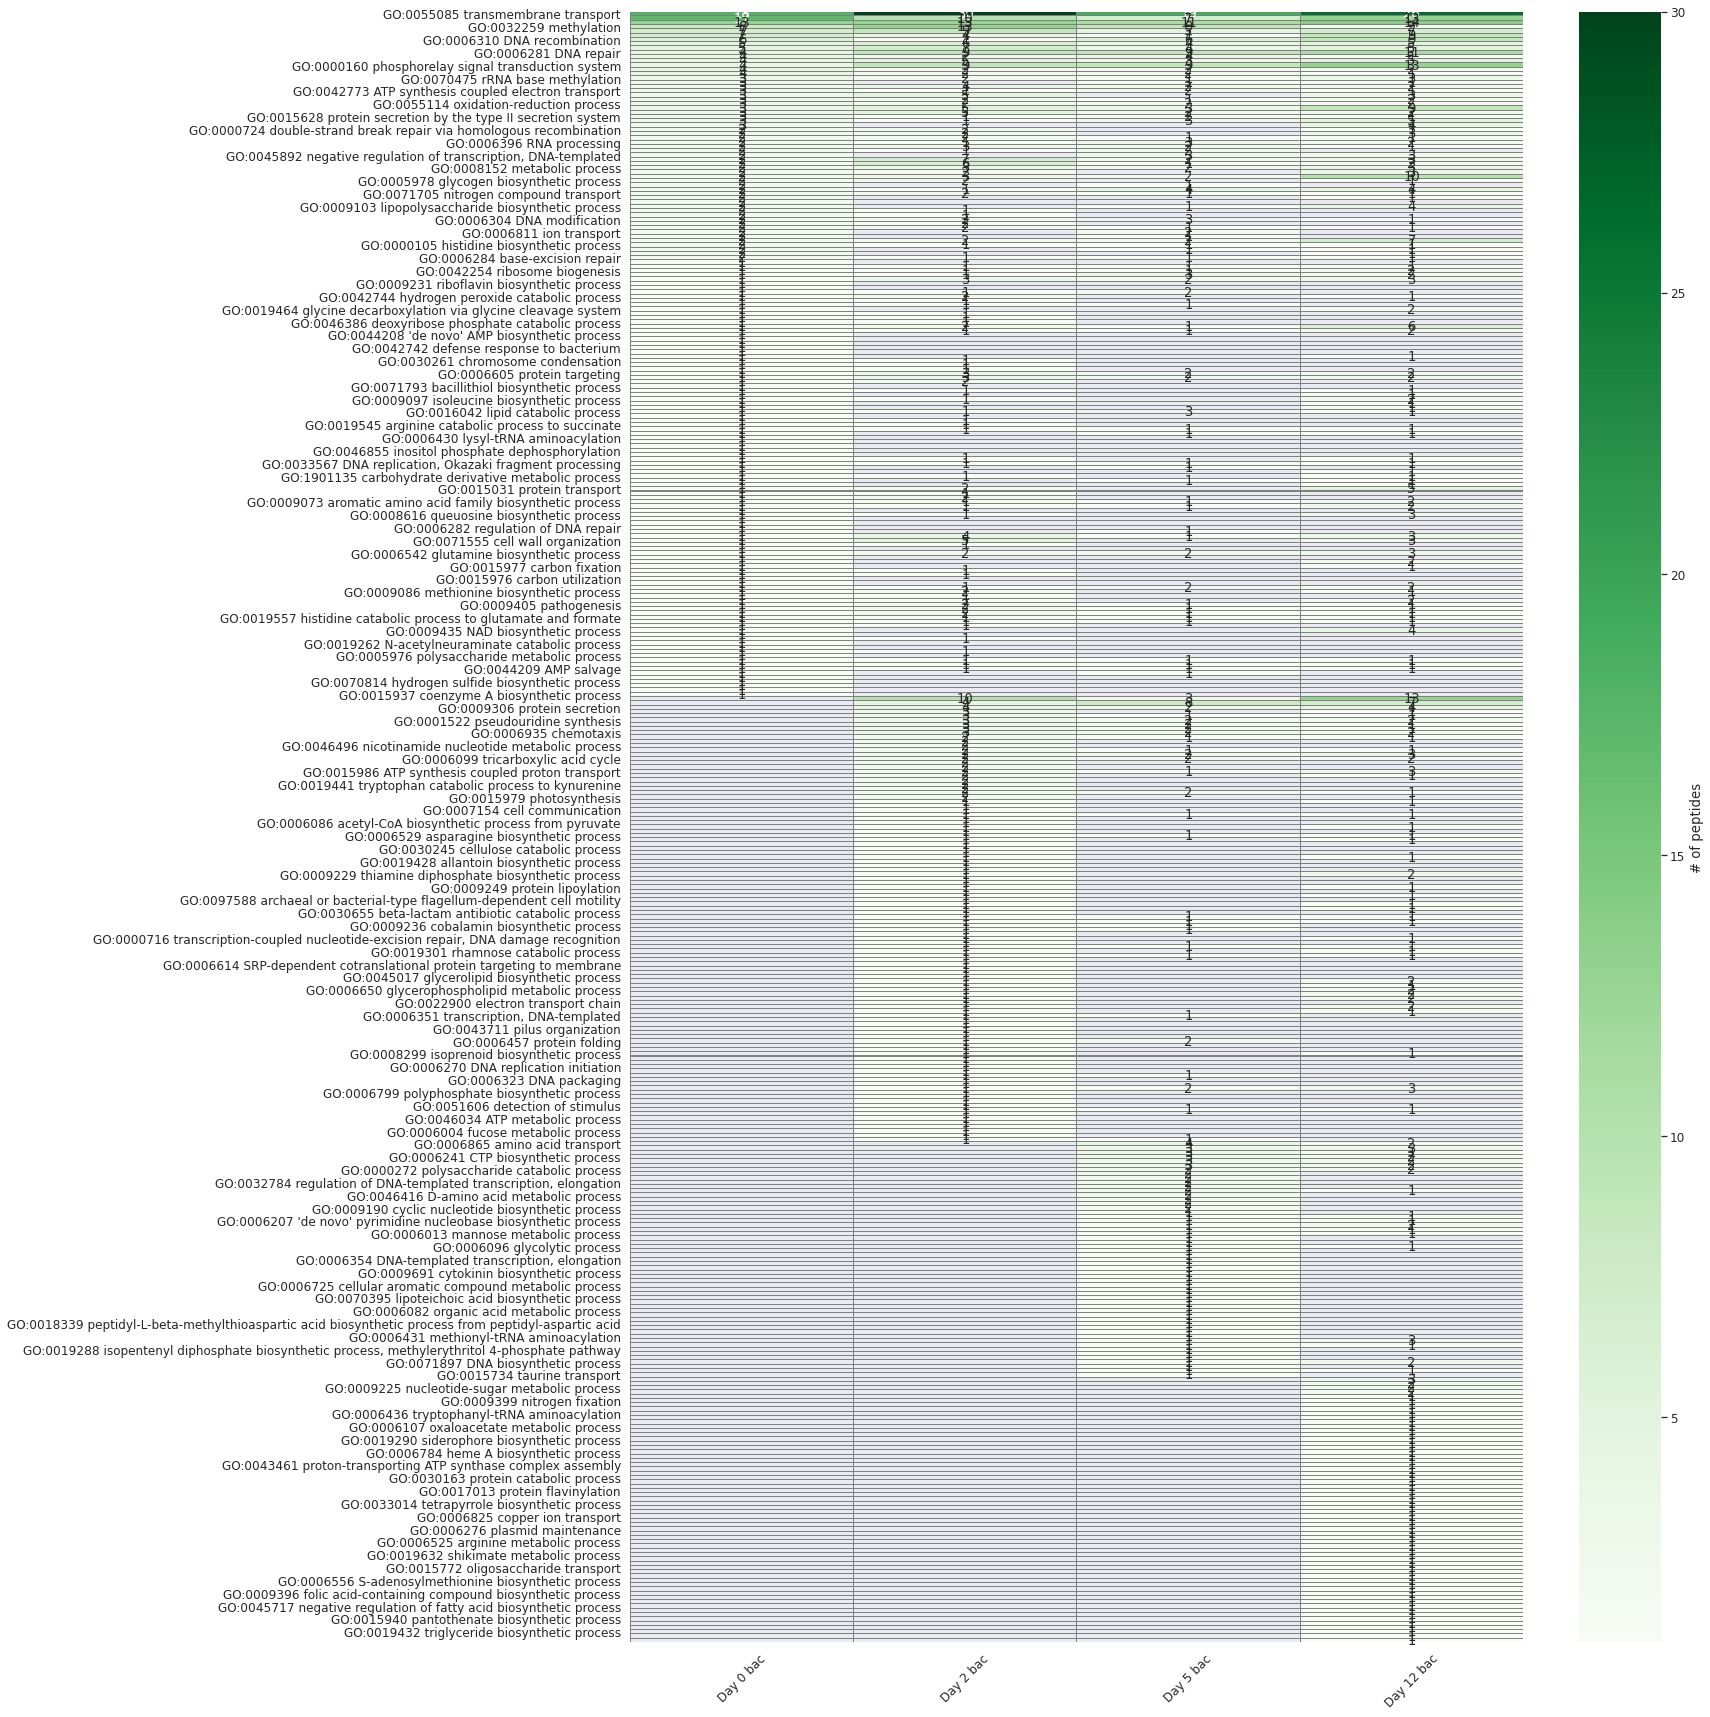

In [18]:
sns.set(font_scale=1.1)  

fig, ax = plt.subplots(figsize=(20,30))

ax = sns.heatmap(combineBP, cmap="Greens", annot=True, fmt='g', linecolor = 'grey', linewidths=.01, \
                square=False, cbar_kws={'label': '# of peptides'}, label='big')

ax.set_ylabel('')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)
    

for item in ax.get_xticklabels():
    item.set_rotation(45)

In [19]:
# rearranged and condensed the csv manually in Libre Calc
# read in new csv:

bac = pd.read_csv("/home/millieginty/Documents/git-repos/rot-mayer/analyses/unipept/GO-terms/DN/TD+ND/DN80_combined_TD+ND_bp_GO_sorted_combined.csv", index_col=0)

bac.head()

,Day 0 bac,Day 2 bac,Day 5 bac,Day 12 bac
GO term,,,,
GO:0055085 transmembrane transport,18,30,19,26
GO:0005975 carbohydrate metabolic process,17,10,7,13
"GO:0006355 regulation of transcription, DNA-templated",13,13,11,14
GO:0032259 methylation,8,13,9,2
GO:0006260 DNA replication,7,9,5,7


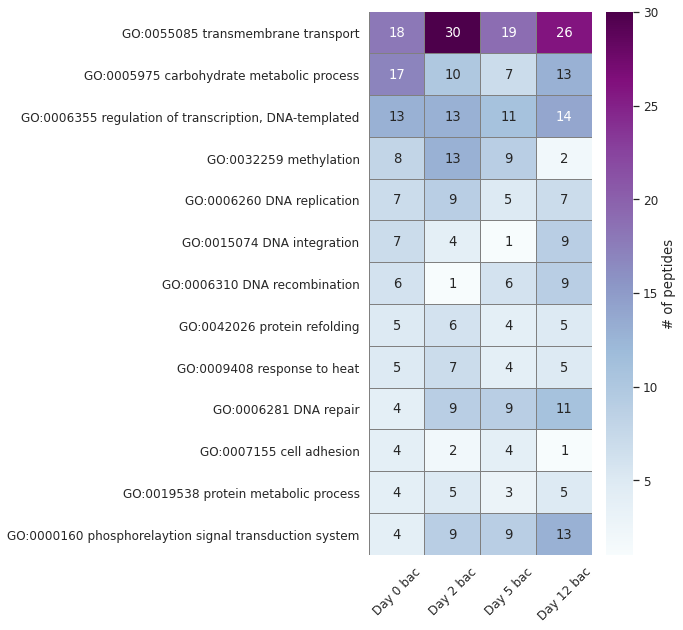

In [22]:
sns.set(font_scale=1.1)  

fig, ax = plt.subplots(figsize=(5,10))

ax = sns.heatmap(bac, cmap="BuPu", annot=True, fmt='g', linecolor = 'grey', linewidths=.01, \
                square=False, cbar_kws={'label': '# of peptides'}, label='big')

ax.set_ylabel('')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)
    

for item in ax.get_xticklabels():
    item.set_rotation(45)